In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is 2239-77DB

 Directory of D:\

03-01-2023  16:29    <DIR>          .ipynb_checkpoints
29-11-2022  12:09                 0 .Rhistory
04-12-2022  16:37            54,784 1.doc
30-12-2022  10:42         3,414,891 1.mp3
28-12-2022  13:08             2,436 50_Startups (1).csv
26-12-2022  17:18             2,436 50_Startups.csv
30-12-2022  14:42           186,204 50strtup.ipynb
27-12-2022  12:26            22,611 A.RESUME 1.docx
13-12-2022  20:38           389,189 A.RESUME 1.pdf
13-12-2022  19:31            22,627 A.RESUME.docx
01-12-2022  20:56                98 aaa.csv
18-11-2022  05:31       651,399,256 Anaconda3-2022.10-Windows-x86_64.exe
13-12-2022  17:21            10,578 Anitha Resume_1(1).docx
13-12-2022  17:20            79,149 Anitha Resume_1(1).pdf
23-11-2022  09:12                22 archive.zip
30-12-2022  14:27         2,529,938 as5k.ipynb
30-12-2022  13:05            56,712 asm4k.ipynb
23-12-2022  12:08    <DIR>          

In [4]:
mb=pd.read_csv("my_movies.csv")
mb

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [6]:
mb.shape

(10, 15)

In [7]:
for i in mb.columns:
    print(i)
    print(mb[i].value_counts())
    print()

V1
Gladiator        6
Sixth Sense      2
LOTR1            1
Harry Potter1    1
Name: V1, dtype: int64

V2
Patriot          6
LOTR1            1
LOTR2            1
Harry Potter2    1
LOTR             1
Name: V2, dtype: int64

V3
Sixth Sense      4
Harry Potter1    1
Braveheart       1
Gladiator        1
Name: V3, dtype: int64

V4
Green Mile    2
Name: V4, dtype: int64

V5
LOTR2    1
Name: V5, dtype: int64

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



In [8]:
mb1=pd.get_dummies(mb)
mb1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [9]:
mn= apriori(mb1, min_support=0.2, use_colnames=True)
mn

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V3_Sixth Sense, Sixth Sense, Patriot, V2_Patr..."
77,0.4,"(V3_Sixth Sense, Sixth Sense, Gladiator, V2_Pa..."
78,0.4,"(V3_Sixth Sense, Sixth Sense, Patriot, V2_Patr..."
79,0.4,"(V3_Sixth Sense, Patriot, Gladiator, V2_Patrio..."


In [11]:
mb1[mb1["Gladiator"]==1].shape[0]/mb1.shape[0]

0.7

In [12]:
rules = association_rules(mn, metric="lift", min_threshold=1.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Sixth Sense),(V1_Sixth Sense),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
3,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Sixth Sense),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
...,...,...,...,...,...,...,...,...,...
545,(V3_Sixth Sense),"(Sixth Sense, Patriot, Gladiator, V2_Patriot, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
546,(Sixth Sense),"(V3_Sixth Sense, Patriot, Gladiator, V2_Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
547,(Patriot),"(V3_Sixth Sense, Sixth Sense, Gladiator, V2_Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
548,(V2_Patriot),"(V3_Sixth Sense, Sixth Sense, Patriot, Gladiat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [15]:
rules = association_rules(mn, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
642,(Sixth Sense),"(V3_Sixth Sense, Patriot, Gladiator, V2_Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
643,(Patriot),"(V3_Sixth Sense, Sixth Sense, Gladiator, V2_Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
644,(Gladiator),"(V3_Sixth Sense, Sixth Sense, Patriot, V2_Patr...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
645,(V2_Patriot),"(V3_Sixth Sense, Sixth Sense, Patriot, Gladiat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [19]:
rules = association_rules(mn, metric="support", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [20]:
rules = association_rules(mn, metric="lift", min_threshold=1.1)
rules[rules["lift"]>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(Sixth Sense),"(V3_Sixth Sense, Patriot, Gladiator, V2_Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(Patriot),"(V3_Sixth Sense, Sixth Sense, Gladiator, V2_Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Gladiator),"(V3_Sixth Sense, Sixth Sense, Patriot, V2_Patr...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
652,(V2_Patriot),"(V3_Sixth Sense, Sixth Sense, Patriot, Gladiat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [21]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V1_Sixth Sense),"(Sixth Sense, V4_Green Mile, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
176,"(V4_Green Mile, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
40,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
86,"(Sixth Sense, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
87,"(Sixth Sense, V1_Sixth Sense)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
90,(Green Mile),"(Sixth Sense, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
91,(V1_Sixth Sense),"(Sixth Sense, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
92,"(Sixth Sense, V4_Green Mile)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
93,"(Sixth Sense, Green Mile)",(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf


In [22]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(Sixth Sense),"(V3_Sixth Sense, Patriot, Gladiator, V2_Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(Patriot),"(V3_Sixth Sense, Sixth Sense, Gladiator, V2_Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Gladiator),"(V3_Sixth Sense, Sixth Sense, Patriot, V2_Patr...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
652,(V2_Patriot),"(V3_Sixth Sense, Sixth Sense, Patriot, Gladiat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


(array([ 52.,   0.,   0.,   0.,   0., 550.,   0.,   2.,   0.,  50.]),
 array([0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 , 0.44, 0.48, 0.52, 0.56, 0.6 ]),
 <BarContainer object of 10 artists>)

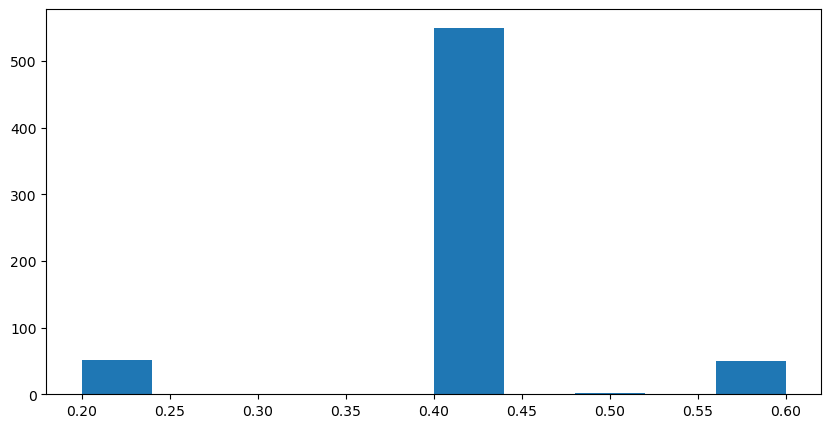

In [33]:
plt.figure(figsize=(10,5))
plt.hist(rules['support'])

(array([  7.,   0.,   0.,  23.,   0., 202.,   0.,  23.,   0., 399.]),
 array([0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 10 artists>)

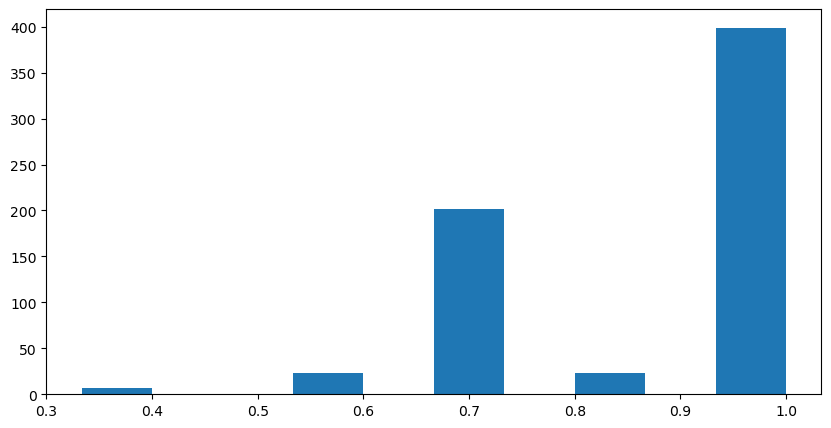

In [34]:
plt.figure(figsize=(10,5))
plt.hist(rules['confidence'])

(array([104., 382.,  16., 114.,   0.,   0.,   0.,   0.,   0.,  38.]),
 array([1.11111111, 1.5       , 1.88888889, 2.27777778, 2.66666667,
        3.05555556, 3.44444444, 3.83333333, 4.22222222, 4.61111111,
        5.        ]),
 <BarContainer object of 10 artists>)

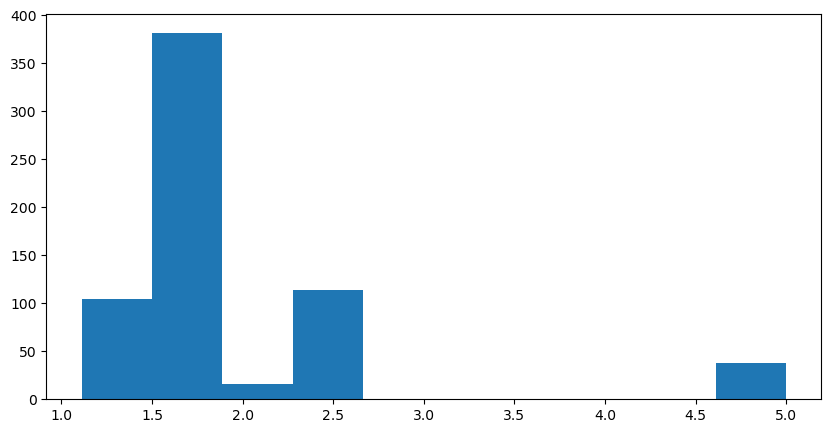

In [35]:
plt.figure(figsize=(10,5))
plt.hist(rules['lift'])